# Assignment 1: PyTorch Introduction

In this assignment, you will start off by constructing a neural networks from scratch to get a stronger understanding of what is required to make neural networks work. Then in the second part of the assignment you will train a neural network (using PyTorch) to classify an image into one of two classes: "car" or "truck". The code for the neural networks
you train will be written for you, and you are not (yet!) expected
to understand all provided code. However, by the end of the assignment,
you should be able to:

1. Understand at a high level the training loop for a machine learning model.
2. Understand the distinction between training, validation, and test data.
3. The concepts of overfitting and underfitting.
4. Investigate how different hyperparameters, such as learning rate and batch size, affect the success of training.
5. Compare an ANN (aka Multi-Layer Perceptron) with a CNN.

*This assignment is based on an assignment developed by Prof. Lisa Zhang.*

### What to submit

Submit an HTML file containing all your code, outputs, and write-up
from parts A and B. Please take extra effort to make your answers and submissions readable. Do not display unnecessary outputs, only the ones that are important for supporting your answers.

You can produce a HTML file directly from Google Colab. The Colab instructions are provided at the end of this document.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission.

## Colab Link

Include a link to your colab file here and ensure the file can be accessed by the our teaching team.

Colab Link:

In [ ]:
# TO BE COMPLETED

# https://colab.research.google.com/drive/13iF9w17X9MLJ7lus9sLkU1bLdupTldlA#scrollTo=NciQVBmzdRb8

#PART A: Constructing a Neural Network [8pt]

Before we get into using PyTorch to train our classifier we will go through the process of creating our neural network from scratch. We've seen in the tutorial how to build a 1-layer network, now we'll take it one step further to build a 2-layer network. This is an important exercise that everyone should attempt at least once to understand and truly appreciate the workings of neural networks.

## Helper Functions

To help guide the construction we will use the iris dataset that was introduced in the tutorial. Provided are some helper code to get us started:

In [42]:
# load "Iris_3class.csv" to Google Colab
from google.colab import files
uploaded = files.upload()

Saving Iris_3class.csv to Iris_3class.csv


In [43]:
import pandas as pd
import numpy as np

raw_data = pd.read_csv("Iris_3class.csv", header = None)
raw_data = raw_data.values
np.random.shuffle(raw_data)

In [44]:
import numpy as np
# raw_data = raw_data.values

# split your data into training and validation
X_train = raw_data[0:100,:4]
y_train = raw_data[0:100,4:5].astype(int)
X_val = raw_data[100:,:4]
y_val = raw_data[100:,4:5].astype(int)

print(X_train.shape, y_train.shape)
print(X_train.dtype, y_train.dtype)
print(X_val.shape, y_val.shape)
print(X_val.dtype, y_val.dtype)

(100, 4) (100, 1)
float64 int64
(50, 4) (50, 1)
float64 int64


Recall that the neural network output consists of several nodes, one for each output class. Since the labels are provided as integers we will need to convert them into one-hot vectors to match the neural network output format.

In [45]:
#Convert array to one-hot encoding
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

In [46]:
y_train = to_one_hot(y_train)
print(X_train.shape, y_train.shape)
print(X_train.dtype, y_train.dtype)

y_val = to_one_hot(y_val)
print(X_val.shape, y_val.shape)
print(X_val.dtype, y_val.dtype)

(100, 4) (100, 3)
float64 float64
(50, 4) (50, 3)
float64 float64


In [47]:
#verify one-hot encoding
y_train[0:5,:]

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Part 1. Develop a 2-layer ANN [6pt MODEL]
At its core a 2-layer neural network is just a few lines of code. Most of the complexity comes from setting up the training of the network.

Using vectorized form, set up the neural network training to use a cross-entropy loss function and determine the gradients with resepect to the layer 1 and layer 2 weights.

In [48]:
# write code to create a 2-layer ANN in vectorized form

#define sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x))

#define softmax
def softmax(x):
  e = np.exp(x)
  return e/e.sum(axis=1, keepdims = True)


def ann(W, X_train, y_train):

  num_hidden = 5
  num_features = 4
  num_outputs = 3

  #Weights
  w0 = W[:20].reshape(num_features, num_hidden)
  w1 = W[20:].reshape(num_hidden, num_outputs)

  #Feed forward
  layer0 = X_train
  layer1 = sigmoid(np.dot(layer0, w0))
  layer2 = np.dot(layer1, w1)

  # softmax
  y_pred = softmax(layer2)

  #Back propagation using gradient descent

  #cross-entropy loss
  error = -np.mean(np.sum(y_train * np.log(y_pred), axis=1)) # TO BE COMPLETED

  #initialize gradients to zero
  dw0 = np.zeros((4,5)) # TO BE COMPLETED
  dw1 = np.zeros((5,3)) # TO BE COMPLETED

  #calculate gradients
  # TO BE COMPLETED
  dL_du_hat = y_pred - y_train
  du_hat_du = y_pred * (1 - y_pred)
  du_dv_hat = w1.T
  dv_hat_dv = layer1 * (1 - layer1)
  dv_dw0 = X_train
  du_dw1 = layer1

  #determine gradients
  # TO BE COMPLETED
  dw1 += du_dw1.T.dot(dL_du_hat*du_hat_du)
  dw0 += dv_dw0.T.dot((dL_du_hat*du_hat_du).dot(du_dv_hat)*(dv_hat_dv))

  #combine gradients into one vector
  dW = np.array(list(dw0.flatten()) + list(dw1.flatten()))

  return (error, dW, y_pred)


## Part 2. Train your neural network [2pt RESULT]
How well does your network work on the iris dataset?

In [49]:
num_hidden = 5
num_features = 4
num_outputs = 3

#initialize weights
w0 = 2*np.random.random((num_features, num_hidden)) - 1
w1 = 2*np.random.random((num_hidden, num_outputs)) - 1

#combine weights into a single vector
W = np.array(list(w0.flatten()) + list(w1.flatten()))

#train network
n = 0.001
iterations = 100000
errors = []
for i in range(iterations):
  (error, dW, y_pred) = ann(W, X_train, y_train)
  W += -dW * n
  errors.append(error)


In [50]:
#examine predictions on training data
(_, _, y_pred) = ann(W, X_train, y_train)
pred = np.round(y_pred, 0)
pred[:5]

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [51]:
#examine ground truth training data
train = np.round(y_train, 0)
train[:5]

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [55]:
error = 0
n = len(train)
for i in range(n):
  if not np.array_equal(train[i], pred[i]):
    error += 1

print("Accuracy : ", 1 - error/n)

'''
PROVIDE YOUR ANSWER BELOW

This model accuracy is 0.99 in train dataset. I think it work well.


'''

Accuracy :  0.99


'\nPROVIDE YOUR ANSWER BELOW\n\nThis model accuracy is 0.99 in train dataset. I think it work well.\n\n\n'

## Part 3. Validation [2pt MODEL]
Validate that the gradients were computed correctly for the 2-layer neural network you developed.

In [54]:
#write code to numerical verify the gradients you calculated

num_hidden = 5
num_features = 4
num_outputs = 3

#initialize weights
w0 = 2*np.random.random((num_features, num_hidden)) - 1
w1 = 2*np.random.random((num_hidden, num_outputs)) - 1

#combine weights
W = np.array(list(w0.flatten()) + list(w1.flatten())) # TO BE COMPLETED

#compute gradients analytically
(error, dW, y_pred) = ann(W, X_train, y_train)

#compute gradients numerically
dW_num = np.zeros((len(W),1))

for ind in range(len(W)):
  #reset gradients
  We1 = np.array(list(w0.flatten()) + list(w1.flatten()))
  We2 = np.array(list(w0.flatten()) + list(w1.flatten()))

  #increment slightly
  epsilon = 1e-6
  We1[ind] += epsilon  # TO BE COMPLETED
  We2[ind] -= epsilon  # TO BE COMPLETED

  #compute errors
  (error_e1, dW_e1, y_pred1) = ann(We1, X_train, y_train)
  (error_e2, dW_e2, y_pred2) = ann(We2, X_train, y_train)

  #obtain numerical gradients
  grad_num = (error_e1 - error_e2) / (2 * epsilon) # TO BE COMPLETED
  dW_num[ind] = grad_num

  #display difference between numerical and analytic gradients
  print(round(abs(grad_num - dW[ind]), 4), grad_num, dW[ind])


0.0198 0.00819041234834117 0.028008456927476912
0.0775 0.02139385357757817 0.09888808580903649
0.1421 0.04715431267676706 0.1892374373166269
0.1265 -0.010123845095577622 -0.13657545637876747
0.3648 0.0035458165292823196 0.3683061874926663
0.0135 0.005540572667328547 0.01899258972011032
0.0533 0.014699406580831464 0.06799426196895617
0.0923 0.03009349192062416 0.12242511553448841
0.0731 -0.007533577095486521 -0.08063912826612561
0.2399 0.037452218215605626 0.27734560941602976
0.006 0.0025047188767501893 0.008458009855646827
0.0227 0.006285236331393662 0.02894081126330864
0.0513 0.018311686833527574 0.06962777008651948
0.0677 -0.001557354467607297 -0.06922025607448791
0.1293 -0.07759859288469784 0.0517254522514768
0.001 0.0004258395858158792 0.0014118843174142643
0.0036 0.0009936238498653438 0.004557770717004578
0.0109 0.004206534898187897 0.01512291803249252
0.0197 0.00020686297119709707 -0.01950429218579005
0.0268 -0.03611114318680109 -0.009351875406116057
0.5936 -0.30441790177526684 -

# PART B: Cars vs Trucks [30Pt]

In the second part of the assignment we will see how we can use PyTorch to train a neural network to identify Cars and Trucks.

In [2]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms


## Part 0. Helper Functions

We will be making use of the following helper functions. You will be asked to look
at and possibly modify some of these, but you are not expected to understand all of them.

You should look at the function names and read the docstrings. If you are curious, come back and explore the code *after* making some progress on the lab.

In [3]:
###############################################################################
# Data Loading

def get_relevant_indices(dataset, classes, target_classes):
    """ Return the indices for datapoints in the dataset that belongs to the
    desired target classes, a subset of all possible classes.

    Args:
        dataset: Dataset object
        classes: A list of strings denoting the name of each class
        target_classes: A list of strings denoting the name of desired classes
                        Should be a subset of the 'classes'
    Returns:
        indices: list of indices that have labels corresponding to one of the
                 target classes
    """
    indices = []
    for i in range(len(dataset)):
        # Check if the label is in the target classes
        label_index = dataset[i][1] # ex: 9
        label_class = classes[label_index] # ex: 'truck'
        if label_class in target_classes:
            indices.append(i)
    return indices

def get_data_loader(target_classes, batch_size):
    """ Loads images of cars and trucks, splits the data into training, validation
    and testing datasets. Returns data loaders for the three preprocessed datasets.

    Args:
        target_classes: A list of strings denoting the name of the desired
                        classes. Should be a subset of the argument 'classes'
        batch_size: A int representing the number of samples per batch

    Returns:
        train_loader: iterable training dataset organized according to batch size
        val_loader: iterable validation dataset organized according to batch size
        test_loader: iterable testing dataset organized according to batch size
        classes: A list of strings denoting the name of each class
    """

    classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    ########################################################################
    # The output of torchvision datasets are PILImage images of range [0, 1].
    # We transform them to Tensors of normalized range [-1, 1].
    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    # Load CIFAR10 training data
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    # Get the list of indices to sample from
    relevant_indices = get_relevant_indices(trainset, classes, target_classes)

    # Split into train and validation
    np.random.seed(1000) # Fixed numpy random seed for reproducible shuffling
    np.random.shuffle(relevant_indices)
    split = int(len(relevant_indices) * 0.8) #split at 80%

    # split into training and validation indices
    relevant_train_indices, relevant_val_indices = relevant_indices[:split], relevant_indices[split:]
    train_sampler = SubsetRandomSampler(relevant_train_indices)
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                               num_workers=1, sampler=train_sampler)
    val_sampler = SubsetRandomSampler(relevant_val_indices)
    val_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              num_workers=1, sampler=val_sampler)
    # Load CIFAR10 testing data
    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    # Get the list of indices to sample from
    relevant_test_indices = get_relevant_indices(testset, classes, target_classes)
    test_sampler = SubsetRandomSampler(relevant_test_indices)
    test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                             num_workers=1, sampler=test_sampler)
    return train_loader, val_loader, test_loader, classes

###############################################################################
# Training
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

def normalize_label(labels):
    """
    Given a tensor containing 2 possible values, normalize this to 0/1

    Args:
        labels: a 1D tensor containing two possible scalar values
    Returns:
        A tensor normalize to 0/1 value
    """
    max_val = torch.max(labels)
    min_val = torch.min(labels)
    norm_labels = (labels - min_val)/(max_val - min_val)
    return norm_labels

def evaluate(net, loader, criterion):
    """ Evaluate the network on the validation set.

     Args:
         net: PyTorch neural network object
         loader: PyTorch data loader for the validation set
         criterion: The loss function
     Returns:
         err: A scalar for the avg classification error over the validation set
         loss: A scalar for the average loss function over the validation set
     """
    total_loss = 0.0
    total_err = 0.0
    total_epoch = 0
    for i, data in enumerate(loader, 0):
        inputs, labels = data
        labels = normalize_label(labels)  # Convert labels to 0/1
        outputs = net(inputs)
        loss = criterion(outputs, labels.float())
        corr = (outputs > 0.0).squeeze().long() != labels
        total_err += int(corr.sum())
        total_loss += loss.item()
        total_epoch += len(labels)
    err = float(total_err) / total_epoch
    loss = float(total_loss) / (i + 1)
    return err, loss

###############################################################################
# Training Curve
def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_err = np.loadtxt("{}_train_err.csv".format(path))
    val_err = np.loadtxt("{}_val_err.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Error")
    n = len(train_err) # number of epochs
    plt.plot(range(1,n+1), train_err, label="Train")
    plt.plot(range(1,n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

## Part 1. Visualizing the Data

We will make use of some of the CIFAR-10 data set, which consists of
colour images of size 32x32 pixels belonging to 10 categories. You can
find out more about the dataset at https://www.cs.toronto.edu/~kriz/cifar.html

For this assignment, we will only be using the car and truck categories.
We have included code that automatically downloads the dataset the
first time that the main script is run.

In [7]:
# This will download the CIFAR-10 dataset to a folder called "data"
# the first time you run this code.
train_loader, val_loader, test_loader, classes = get_data_loader(
    target_classes=["car", "truck"],
    batch_size=1) # One image per batch

100%|██████████| 170498071/170498071 [00:02<00:00, 58298479.00it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### Part (i) [0.5pt EXPLORATORY]

Visualize some of the data by running the code below.
Include the visualization in your writeup.

(You don't need to submit anything else.)

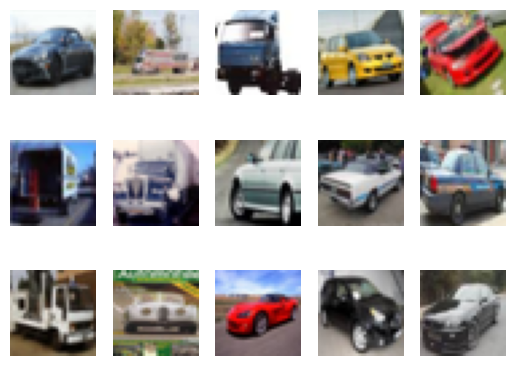

In [9]:
import matplotlib.pyplot as plt

k = 0
for images, labels in train_loader:
    # since batch_size = 1, there is only 1 image in `images`
    image = images[0]
    # place the colour channel at the end, instead of at the beginning
    img = np.transpose(image, [1,2,0])
    # normalize pixel intensity values to [0, 1]
    img = img / 2 + 0.5
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.imshow(img)

    k += 1
    if k > 14:
        break

In [10]:
'''
PROVIDE YOUR ANSWER BELOW

Of the 10 classes in CIFAR-10, only car and truck were received as train_loader,
so when you print the image, you can see that only these two classes appear.


'''

'\nPROVIDE YOUR ANSWER BELOW\n\nOf the 10 classes in CIFAR-10, only car and truck were received as train_loader, \nso when you print the image, you can see that only these two classes appear.\n\n\n'

### Part (ii) [1pt EXPLORATORY]

How many training examples do we have for the combined `car` and `truck` classes?
What about validation examples?
What about test examples?

In [11]:
# TO BE COMPLETED
print(train_loader, val_loader, test_loader, classes)
print(len(train_loader))
print(len(val_loader))
print(len(test_loader))
print(len(classes))

<torch.utils.data.dataloader.DataLoader object at 0x7bb6de4f5a50> <torch.utils.data.dataloader.DataLoader object at 0x7bb6de4f5780> <torch.utils.data.dataloader.DataLoader object at 0x7bb6de4f5c00> ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
8000
2000
2000
10


In [14]:
'''
PROVIDE YOUR ANSWER BELOW

training examples   = 8000
validation examples = 2000
test examples       = 2000

'''

'\nPROVIDE YOUR ANSWER BELOW\n\ntraining examples   = 8000\nvalidation examples = 2000\ntest examples       = 2000\n\n'

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Part 2. Training

We define two neural networks, a `LargeNet` and `SmallNet`.
We'll be training the networks in this section.

You won't understand fully what these networks are doing until
the next few classes, and that's okay. For this assignment, please
focus on learning how to train networks, and how hyperparameters affect
training.

In [4]:
class LargeNet(nn.Module):
    def __init__(self):
        super(LargeNet, self).__init__()
        self.name = "large"
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 10, 5)
        self.fc1 = nn.Linear(10 * 5 * 5, 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [5]:
class SmallNet(nn.Module):
    def __init__(self):
        super(SmallNet, self).__init__()
        self.name = "small"
        self.conv = nn.Conv2d(3, 5, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(5 * 7 * 7, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv(x)))
        x = self.pool(x)
        x = x.view(-1, 5 * 7 * 7)
        x = self.fc(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [5]:
small_net = SmallNet()
large_net = LargeNet()

### Part (i) [1pt EXPLORATORY]

The methods `small_net.parameters()` and `large_net.parameters()`
produces an iterator of all the trainable parameters of the network.
These parameters are torch tensors containing many scalar values.

We haven't learned how how the parameters in these high-dimensional
tensors will be used, but we should be able to count the number
of parameters. Measuring the number of parameters in a network is
one way of measuring the "size" of a network.

What is the total number of parameters in `small_net` and in
`large_net`? (Hint: how many numbers are in each tensor?)

In [13]:
# TO BE COMPLETED
for param in small_net.parameters():
    print(param.shape)

for params in large_net.parameters():
  print(params.shape)

# count parameters in small_net and large_net
def count_params(model):
  return sum(p.numel() for p in model.parameters() if p.requires_grad)

print('total small_net params : ', count_params(small_net))
print('total large_net params : ', count_params(large_net))



torch.Size([5, 3, 3, 3])
torch.Size([5])
torch.Size([1, 245])
torch.Size([1])
torch.Size([5, 3, 5, 5])
torch.Size([5])
torch.Size([10, 5, 5, 5])
torch.Size([10])
torch.Size([32, 250])
torch.Size([32])
torch.Size([1, 32])
torch.Size([1])
total small_net params :  386
total large_net params :  9705


In [14]:
'''
PROVIDE YOUR ANSWER BELOW

small_net has 386 parameters
large_net has 9705 parameters

'''

'\nPROVIDE YOUR ANSWER BELOW\n\nsmall_net has 386 parameters\nlarge_net has 9705 parameters\n\n'

### The function train_net

The function `train_net` below takes an untrained neural network (like `small_net` and `large_net`) and
several other parameters. You should be able to understand how this function works.
The figure below shows the high level training loop for a machine learning model:

![alt text](https://github.com/UTNeural/Lab2/blob/master/Diagram.png?raw=true)

In [6]:
def train_net(net, batch_size=64, learning_rate=0.01, num_epochs=30):
    ########################################################################
    # Train a classifier on cars vs trucks
    target_classes = ["car", "truck"]
    ########################################################################
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(1000)
    ########################################################################
    # Obtain the PyTorch data loader objects to load batches of the datasets
    train_loader, val_loader, test_loader, classes = get_data_loader(
            target_classes, batch_size)
    ########################################################################
    # Define the Loss function and optimizer
    # The loss function will be Binary Cross Entropy (BCE). In this case we
    # will use the BCEWithLogitsLoss which takes unnormalized output from
    # the neural network and scalar label.
    # Optimizer will be SGD with Momentum.
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    ########################################################################
    # Set up some numpy arrays to store the training/test loss/erruracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    ########################################################################
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        total_train_loss = 0.0
        total_train_err = 0.0
        total_epoch = 0
        for i, data in enumerate(train_loader, 0):
            # Get the inputs
            inputs, labels = data
            labels = normalize_label(labels) # Convert labels to 0/1
            # Zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass, backward pass, and optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels.float())
            loss.backward()
            optimizer.step()
            # Calculate the statistics
            corr = (outputs > 0.0).squeeze().long() != labels
            total_train_err += int(corr.sum())
            total_train_loss += loss.item()
            total_epoch += len(labels)
        train_err[epoch] = float(total_train_err) / total_epoch
        train_loss[epoch] = float(total_train_loss) / (i+1)
        val_err[epoch], val_loss[epoch] = evaluate(net, val_loader, criterion)
        print(("Epoch {}: Train err: {}, Train loss: {} |"+
               "Validation err: {}, Validation loss: {}").format(
                   epoch + 1,
                   train_err[epoch],
                   train_loss[epoch],
                   val_err[epoch],
                   val_loss[epoch]))
        # Save the current model (checkpoint) to a file
        model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
        torch.save(net.state_dict(), model_path)
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))
    # Write the train/test loss/err into CSV file for plotting later
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_err.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)

### Part (ii) [0.5pt EXPLORATORY]

The parameters to the function `train_net` are hyperparameters of our neural network.
We made these hyperparameters easy to modify so that we can tune them later on.

What are the default values of the parameters `batch_size`, `learning_rate`,
and `num_epochs`?

In [16]:

'''
PROVIDE YOUR ANSWER BELOW

default values of batch_size is 64
default values of learning_rate is 0.01
default values of num_epochs is 30

'''

'\nPROVIDE YOUR ANSWER BELOW\n\ndefault values of batch_size is 64\ndefault values of learning_rate is 0.01\ndefault values of num_epochs is 30\n\n'

### Part (iii) [0.5pt EXPLORATORY]
What files are written to disk when we call `train_net` with `small_net`, and train for 5 epochs? Provide a list
of all the files written to disk, and what information the files contain.

In [17]:

'''
PROVIDE YOUR ANSWER BELOW

code : train_net(small_net, num_epochs=5)

- model_small_bs64_lr0.01_epoch0
- model_small_bs64_lr0.01_epoch1
- model_small_bs64_lr0.01_epoch2
- model_small_bs64_lr0.01_epoch3
- model_small_bs64_lr0.01_epoch4
- model_small_bs64_lr0.01_epoch4_train_err.csv
- model_small_bs64_lr0.01_epoch4_train_loss.csv
- model_small_bs64_lr0.01_epoch4_val_err.csv
- model_small_bs64_lr0.01_epoch4_val_loss.csv

When we call train_net with small_net and train for 5 epochs,
this above files are written in disk.
The checkpoint(saved values of model weights) is written in model_small_bs_64_lr0.01_epoch0~4 for each epoch.

In the remaining files, values ​​are stored according to their names.
For example, in the case of model_small_bs64_lr0.01_epoch4_train_err.csv,
the error for each epoch is stored in the train data.



'''

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.367, Train loss: 0.6403269925117493 |Validation err: 0.3645, Validation loss: 0.6265784669667482
Epoch 2: Train err: 0.31975, Train loss: 0.5953841836452484 |Validation err: 0.306, Validation loss: 0.5799333546310663
Epoch 3: Train err: 0.270875, Train loss: 0.5415952701568604 |Validation err: 0.2585, Validation loss: 0.5198571123182774
Epoch 4: Train err: 0.232375, Train loss: 0.4937185139656067 |Validation err: 0.216, Validation loss: 0.4665250051766634
Epoch 5: Train err: 0.204, Train loss: 0.4470535283088684 |Validation err: 0.205, Validation loss: 0.4423513552173972
Finished Training
Total time elapsed: 22.96 seconds


'\nPROVIDE YOUR ANSWER BELOW\n\n- model_small_bs64_lr0.01_epoch0\n- model_small_bs64_lr0.01_epoch1\n- model_small_bs64_lr0.01_epoch2\n- model_small_bs64_lr0.01_epoch3\n- model_small_bs64_lr0.01_epoch4\n- model_small_bs64_lr0.01_epoch4_train_err.csv\n- model_small_bs64_lr0.01_epoch4_train_loss.csv\n- model_small_bs64_lr0.01_epoch4_val_err.csv\n- model_small_bs64_lr0.01_epoch4_val_loss.csv\n\nWhen we call train_net with small_net and train for 5 epochs,\nthis above files are written in disk.\nThe checkpoint is written in model_small_bs_64_lr0.01_epoch0~4 for each epoch.\n\nIn the remaining files, values \u200b\u200bare stored according to their names.\nFor example, in the case of model_small_bs64_lr0.01_epoch4_train_err.csv,\nthe error for each epoch is stored in the train data.\n\n\n\n'

### Part (iv) [0.5pt EXPLORATORY]
Train both `small_net` and `large_net` using the function `train_net` and its default parameters.
The function will write many files to disk, including a model checkpoint (saved values of model weights)
at the end of each epoch.

If you are using Google Colab, you will need to mount Google Drive
so that the files generated by `train_net` gets saved. We will be using
these files in the parts that follow.
(See the Google Colab tutorial for more information about this.)

Report the total time elapsed when training each network. Which network took longer to train?
Why?

In [18]:
# Since the function writes files to disk, you will need to mount
# your Google Drive. If you are working on the assignment locally, you
# can comment out this code.

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [24]:

# TO BE COMPLETED
train_net(small_net)
train_net(large_net)


Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.369375, Train loss: 0.642531762599945 |Validation err: 0.351, Validation loss: 0.6219544932246208
Epoch 2: Train err: 0.304125, Train loss: 0.5825431771278381 |Validation err: 0.2795, Validation loss: 0.5464291693642735
Epoch 3: Train err: 0.236, Train loss: 0.5017420396804809 |Validation err: 0.2195, Validation loss: 0.47339920699596405
Epoch 4: Train err: 0.21575, Train loss: 0.4678726525306702 |Validation err: 0.2025, Validation loss: 0.4510275311768055
Epoch 5: Train err: 0.19975, Train loss: 0.44158821868896486 |Validation err: 0.195, Validation loss: 0.42673848289996386
Epoch 6: Train err: 0.197125, Train loss: 0.4354671580791473 |Validation err: 0.215, Validation loss: 0.45197810884565115
Epoch 7: Train err: 0.19, Train loss: 0.42078052830696105 |Validation err: 0.19, Validation loss: 0.43164059426635504
Epoch 8: Train err: 0.177125, Train loss: 0.40282283759117127 |Validation err: 

In [25]:
'''
PROVIDE YOUR ANSWER BELOW

Total time of train_net with small_net elapsed: 158.61 seconds
Total time of train_net with large_net elapsed: 167.48 seconds

Total time of train_net with large_net requires more time
,because this model has more parameters then train_net with small_net.

'''

'\nPROVIDE YOUR ANSWER BELOW\n\nTotal time of train_net with small_net elapsed: 158.61 seconds\nTotal time of train_net with large_net elapsed: 183.46 seconds\n\nTotal time of train_net with large_net requires more time\n,because this model has more parameters then train_net with small_net\n\n\n\n'

### Part (v) [0.5pt EXPLORATORY]
Use the function `plot_training_curve` to display the trajectory of the
training/validation error and the training/validation loss.
You will need to use the function `get_model_name` to generate the
argument to the `plot_training_curve` function.

Do this for both the small network and the large network. Include both plots
in your writeup.

In [26]:
#model_path = get_model_name("small", batch_size=??, learning_rate=??, epoch=29)

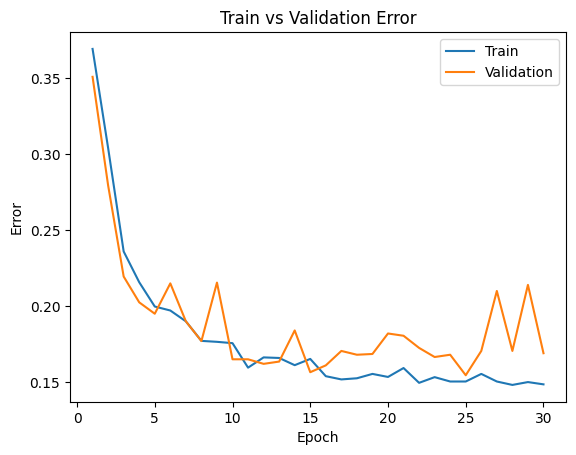

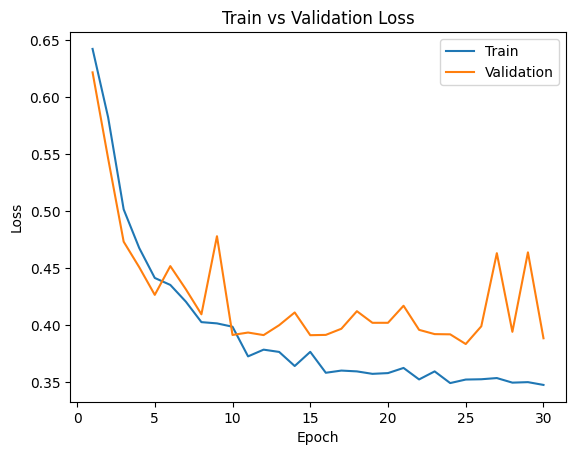

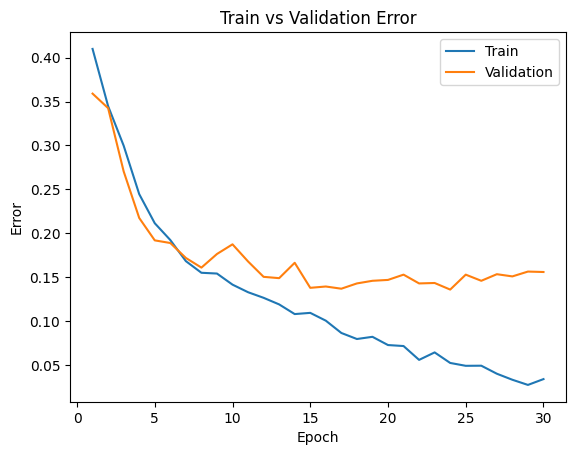

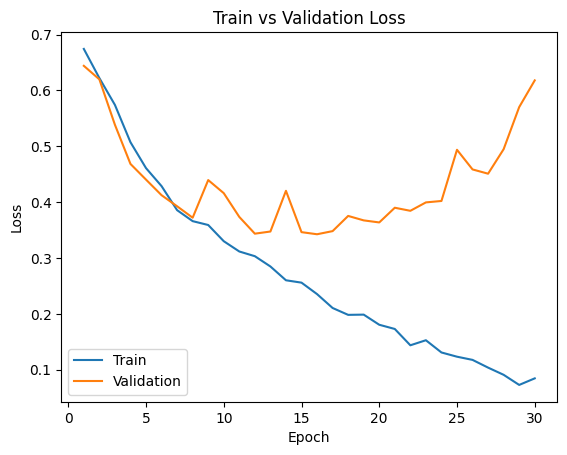

In [27]:
# TO BE COMPLETED
small_model_path = get_model_name("small", batch_size=64, learning_rate=0.01, epoch=29)
large_model_path = get_model_name("large", batch_size=64, learning_rate=0.01, epoch=29)

plot_training_curve(small_model_path)
plot_training_curve(large_model_path)


In [28]:
'''
PROVIDE YOUR ANSWER BELOW

Depending on the size of the model,
we can see that learning occurs differently even if the same hyperparameters are given.
Although it is important to tune hyperparameters according to the dataset,
It can be seen that determining the appropriate model size is also important.

'''

'\nPROVIDE YOUR ANSWER BELOW\n\nDepending on the size of the model, \nwe can see that learning occurs differently even if the same hyperparameters are given. \nAlthough it is important to tune hyperparameters according to the dataset,\nIt can be seen that determining the appropriate model size is also important.\n\n\n'

### Part (vi) [0.5pt EXPLORATORY]
Describe what you notice about the training curve.
How do the curves differ for `small_net` and `large_net`?
Identify any occurences of underfitting and overfitting.

In [29]:
'''
PROVIDE YOUR ANSWER BELOW

In small_net, although the values ​​bounced a little at the end,
learning was successful as both the train loss and val loss were reduced well.
In large_net, overfitting is seen as the validation loss decreases and then increases as the epoch increases.

'''

'\nPROVIDE YOUR ANSWER BELOW\n\nIn small_net, although the values \u200b\u200bbounced a little at the end, \nlearning was successful as both the train loss and val loss were reduced well.\nIn large_net, overfitting is seen as the validation loss decreases and then increases as the epoch increases.\n\n'

## Part 3. Optimization Parameters

For this section, we will work with `large_net` only.

### Part (i) [0.5pt EXPLORATORY]
Train `large_net` with all default parameters, except set `learning_rate=0.001`.
Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *lowering* the learning rate.

In [30]:
# Note: When we re-construct the model, we start the training
# with *random weights*. If we omit this code, the values of
# the weights will still be the previously trained values.
large_net = LargeNet()

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.4585, Train loss: 0.6922090911865234 |Validation err: 0.4145, Validation loss: 0.6918484680354595
Epoch 2: Train err: 0.404, Train loss: 0.6912762837409974 |Validation err: 0.401, Validation loss: 0.6909310147166252
Epoch 3: Train err: 0.39125, Train loss: 0.6897973504066467 |Validation err: 0.3825, Validation loss: 0.6891596242785454
Epoch 4: Train err: 0.391, Train loss: 0.6871493883132934 |Validation err: 0.379, Validation loss: 0.6860428061336279
Epoch 5: Train err: 0.37275, Train loss: 0.6819084930419922 |Validation err: 0.3725, Validation loss: 0.6794121749699116
Epoch 6: Train err: 0.367, Train loss: 0.6722611665725708 |Validation err: 0.3745, Validation loss: 0.6701584309339523
Epoch 7: Train err: 0.367375, Train loss: 0.6595345559120178 |Validation err: 0.3785, Validation loss: 0.6627401951700449
Epoch 8: Train err: 0.36425, Train loss: 0.6492524642944336 |Validation err: 0.3765, 

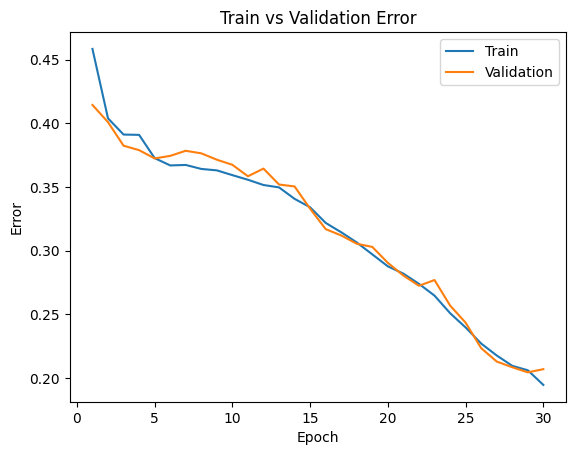

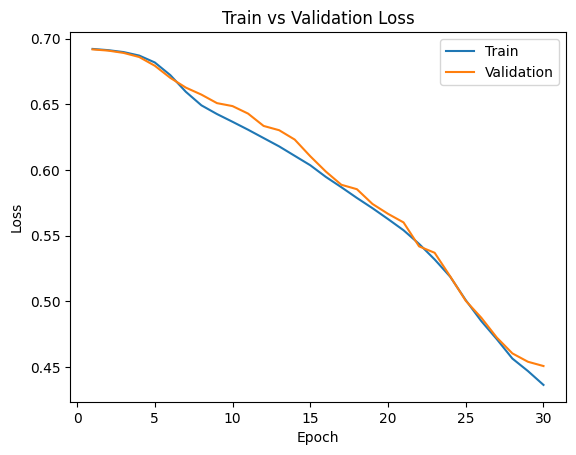

In [31]:
# TO BE COMPLETED

train_net(large_net, learning_rate=0.001)
large_model_lr001_path = get_model_name("large", batch_size=64, learning_rate=0.001, epoch=29)
plot_training_curve(large_model_lr001_path)



In [56]:
'''
PROVIDE YOUR ANSWER BELOW

Total time elapsed: 167.89 seconds.
The time taken is similar compared to when the learning rate is set to 0.01.

When large_net was trained with the default value,
an overfitting problem occurred,
but when the learning rate was reduced and retrained,
both the train loss and val loss were well reduced, showing that the overfitting problem was solved.


'''

'\nPROVIDE YOUR ANSWER BELOW\n\nTotal time elapsed: 167.89 seconds.\nThe time taken is similar compared to when the learning rate is set to 0.01.\n\nWhen large_net was trained with the default value, \nan overfitting problem occurred, \nbut when the learning rate was reduced and retrained, \nboth the train loss and val loss were well reduced, showing that the overfitting problem was solved.\n\n\n'

### Part (ii) [0.5pt EXPLORATORY]
Train `large_net` with all default parameters, except set `learning_rate=0.1`.
Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *increasing* the learning rate.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.3435, Train loss: 0.6152465670108795 |Validation err: 0.2655, Validation loss: 0.5401884317398071
Epoch 2: Train err: 0.26275, Train loss: 0.5457514839172364 |Validation err: 0.2255, Validation loss: 0.47185863088816404
Epoch 3: Train err: 0.205125, Train loss: 0.4577759726047516 |Validation err: 0.196, Validation loss: 0.42472241446375847
Epoch 4: Train err: 0.18375, Train loss: 0.42987853920459745 |Validation err: 0.193, Validation loss: 0.4498207103461027
Epoch 5: Train err: 0.182875, Train loss: 0.4176621789932251 |Validation err: 0.1765, Validation loss: 0.3949774377979338
Epoch 6: Train err: 0.1775, Train loss: 0.407295166015625 |Validation err: 0.218, Validation loss: 0.47349493484944105
Epoch 7: Train err: 0.15425, Train loss: 0.36420914459228515 |Validation err: 0.1665, Validation loss: 0.3992267334833741
Epoch 8: Train err: 0.143125, Train loss: 0.34258134818077085 |Validation er

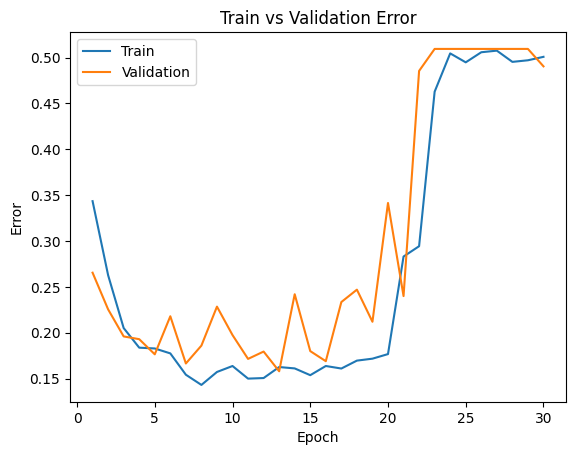

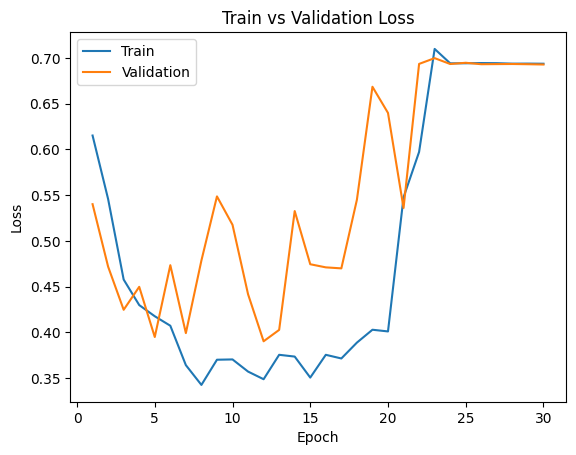

In [33]:
# TO BE COMPLETED

large_net = LargeNet()
train_net(large_net, learning_rate=0.1)
large_model_lr1_path = get_model_name("large", batch_size=64, learning_rate=0.1, epoch=29)
plot_training_curve(large_model_lr1_path)



In [57]:
'''
PROVIDE YOUR ANSWER BELOW

Total time elapsed: 166.09 seconds
The time taken is similar compared to when the learning rate is set to 0.01.


At first, it seems like the learning is going well, but you can see that the error rate increases as time progresses.
Compared to the default learning rate, the learning rate is so high that the gradient can be seen to diverge.

'''

'\nPROVIDE YOUR ANSWER BELOW\n\nTotal time elapsed: 166.09 seconds\nThe time taken is similar compared to when the learning rate is set to 0.01.\n\n\nAt first, it seems like the learning is going well, but you can see that the error rate increases as time progresses. \nCompared to the default learning rate, the learning rate is so high that the gradient can be seen to diverge.\n\n'

### Part (iii) [0.5pt EXPLORATORY]

Train `large_net` with all default parameters, including with `learning_rate=0.01`.
Now, set `batch_size=512`. Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *increasing* the batch size.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.466, Train loss: 0.6923338621854782 |Validation err: 0.44, Validation loss: 0.6918952614068985
Epoch 2: Train err: 0.413, Train loss: 0.6914851702749729 |Validation err: 0.403, Validation loss: 0.6910877674818039
Epoch 3: Train err: 0.4035, Train loss: 0.6901152096688747 |Validation err: 0.3925, Validation loss: 0.6894860416650772
Epoch 4: Train err: 0.4, Train loss: 0.6876360848546028 |Validation err: 0.393, Validation loss: 0.686403214931488
Epoch 5: Train err: 0.373625, Train loss: 0.6824756488204002 |Validation err: 0.374, Validation loss: 0.6796957552433014
Epoch 6: Train err: 0.364375, Train loss: 0.6726636365056038 |Validation err: 0.3685, Validation loss: 0.6694183051586151
Epoch 7: Train err: 0.36475, Train loss: 0.6583152934908867 |Validation err: 0.3765, Validation loss: 0.659694567322731
Epoch 8: Train err: 0.365, Train loss: 0.6487302668392658 |Validation err: 0.38, Validation

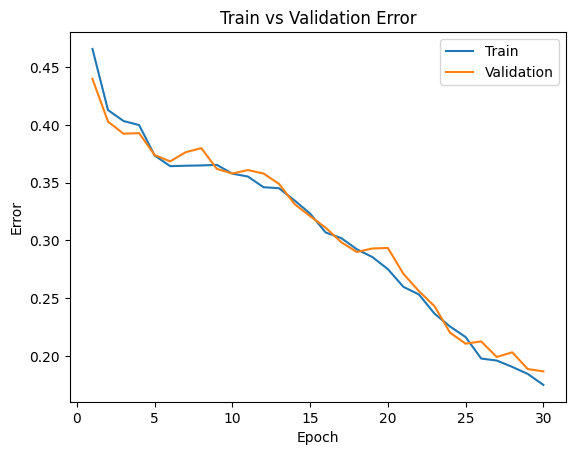

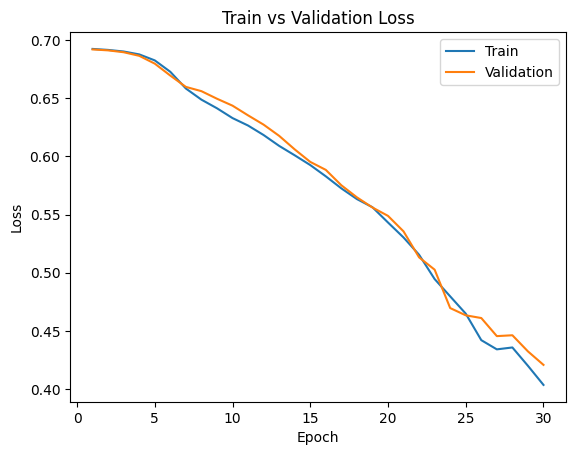

In [35]:
# TO BE COMPLETED

large_net = LargeNet()
train_net(large_net, learning_rate=0.01, batch_size=512)
large_model_bs512_path = get_model_name("large", batch_size=512, learning_rate=0.01, epoch=29)
plot_training_curve(large_model_bs512_path)


In [59]:
'''
PROVIDE YOUR ANSWER BELOW

Total time elapsed: 148.26 seconds

Compared to the default batch size of 64,
the time taken decreased when the batch size was increased to 512.

By increasing the batch size,
we can solve the problem of overfitting in large_net and see that the train loss and val loss are well reduced.


'''

'\nPROVIDE YOUR ANSWER BELOW\n\nTotal time elapsed: 148.26 seconds\n\nCompared to the default batch size of 64, \nthe time taken decreased when the batch size was increased to 512.\n\nBy increasing the batch size, \nwe can solve the problem of overfitting in large_net and see that the train loss and val loss are well reduced.\n\n\n'

### Part (iv) [0.5pt EXPLORATORY]

Train `large_net` with all default parameters, including with `learning_rate=0.01`.
Now, set `batch_size=16`. Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *decreasing* the batch size.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.34375, Train loss: 0.6175165125727653 |Validation err: 0.2625, Validation loss: 0.540454069852829
Epoch 2: Train err: 0.22325, Train loss: 0.4730004854500294 |Validation err: 0.2035, Validation loss: 0.43918069565296175
Epoch 3: Train err: 0.25525, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 4: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 5: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 6: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 7: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 8: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 9: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 10: Train err: 0.502375, Train lo

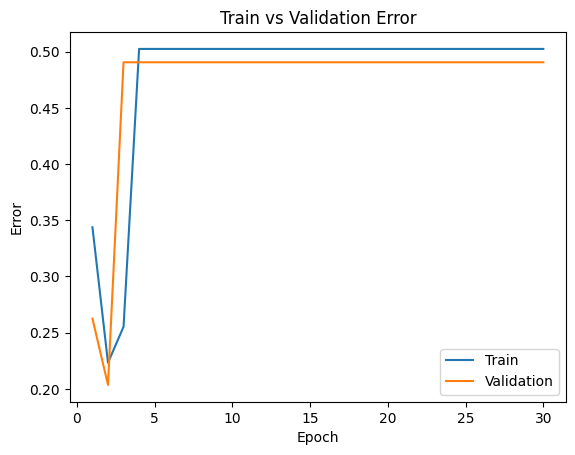

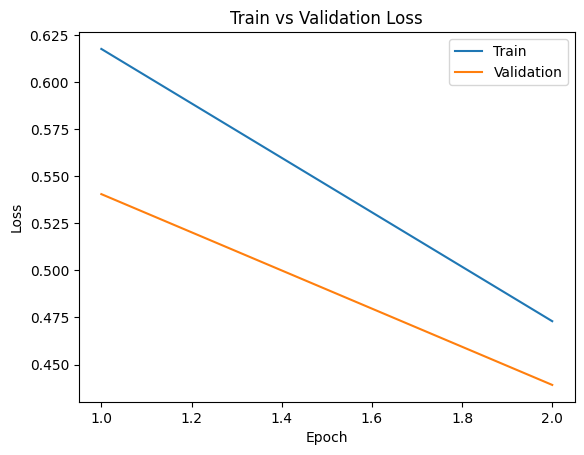

In [37]:
# TO BE COMPLETED

large_net = LargeNet()
train_net(large_net, learning_rate=0.01, batch_size=16)
large_model_bs16_path = get_model_name("large", batch_size=16, learning_rate=0.01, epoch=29)
plot_training_curve(large_model_bs16_path)





In [60]:
'''
PROVIDE YOUR ANSWER BELOW

Total time elapsed: 233.08 seconds


Compared to the default batch size of 64,
we can see that the time taken increases noticeably when the batch size is reduced to 16.

By reducing the batch size, we can see that learning is no more effective than the previous overfitting in large_net.
We can see that the train loss and val loss are not calculated properly.


'''

'\nPROVIDE YOUR ANSWER BELOW\n\nTotal time elapsed: 233.08 seconds\n\n\nCompared to the default batch size of 64, \nwe can see that the time taken increases noticeably when the batch size is reduced to 16.\n\nBy reducing the batch size, we can see that learning is no more effective than the previous overfitting in large_net.\nWe can see that the train loss and val loss are not calculated properly.\n\n\n'

## Part 4. Hyperparameter Search

### Part (i) [1pt EXPLORATORY]

Based on the plots from above, choose another set of values for the hyperparameters (network, batch_size, learning_rate)
that you think would help you improve the validation accuracy. Justify your choice.

In [27]:
'''
PROVIDE YOUR ANSWER BELOW

Among the experimental results above,
learning was good when net : large, batch size: 512, and learning rate: 0.02, but learning was a bit slow.
I think it will work well if I raise the learning rate a little more,
so I think it will work well if I set the learning rate to 0.02.

'''

'\nPROVIDE YOUR ANSWER BELOW\n\nAmong the experimental results above, \nlearning was good when net : large, batch size: 512, and learning rate: 0.001, but learning was a bit slow.\nI think it will work well if I raise the learning rate a little more, \nso I think it will work well if I set the learning rate to 0.03.\n\n'

### Part (ii) [0.5pt EXPLORATORY]

Train the model with the hyperparameters you chose in part(i), and include the training curve.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.502375, Train loss: 0.6925000324845314 |Validation err: 0.487, Validation loss: 0.6912426501512527
Epoch 2: Train err: 0.413375, Train loss: 0.690029252320528 |Validation err: 0.385, Validation loss: 0.6884188652038574
Epoch 3: Train err: 0.374, Train loss: 0.6838702745735645 |Validation err: 0.3865, Validation loss: 0.6790875196456909
Epoch 4: Train err: 0.369375, Train loss: 0.6640205383300781 |Validation err: 0.3765, Validation loss: 0.6567237675189972
Epoch 5: Train err: 0.358625, Train loss: 0.6419175677001476 |Validation err: 0.3595, Validation loss: 0.6420343816280365
Epoch 6: Train err: 0.3455, Train loss: 0.6248779185116291 |Validation err: 0.347, Validation loss: 0.6211141496896744
Epoch 7: Train err: 0.32825, Train loss: 0.6037253029644489 |Validation err: 0.319, Validation loss: 0.5978287905454636
Epoch 8: Train err: 0.30675, Train loss: 0.5885379910469055 |Validation err: 0.29

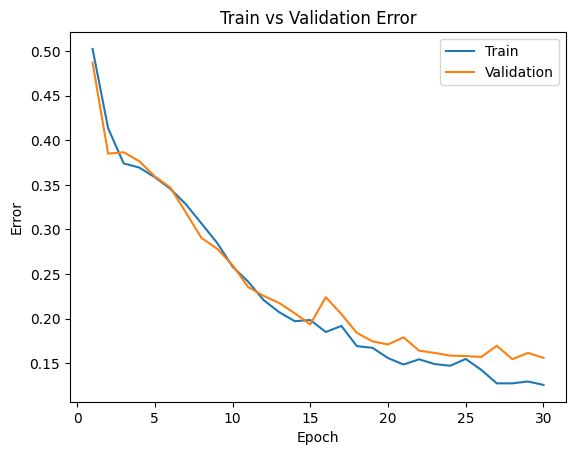

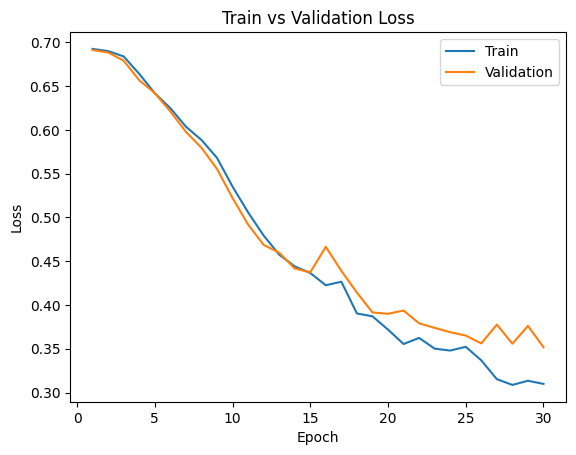

In [12]:
# TO BE COMPLETED

large_net = LargeNet()
train_net(large_net, learning_rate=0.02, batch_size=512)
large_model_bs512_lr02_path = get_model_name("large", batch_size=512, learning_rate=0.02, epoch=29)
plot_training_curve(large_model_bs512_lr02_path)


### Part (iii) [1pt EXPLORATORY]
Based on your result from Part(i), suggest another set of hyperparameter values to try.
Justify your choice.

In [20]:
'''
PROVIDE YOUR ANSWER BELOW

As we go further back in Part (i),
We can see that the train los and val loss are different, but the loss is decreasing.
Let's experiment by increasing the epoch to lower the error.

net : large, batch size: 512, and learning rate: 0.02, number of epoch : 50


'''

"\nPROVIDE YOUR ANSWER BELOW\n\nAs we go further back in Part (i), \nWe can see that the train los and val loss are different, but the loss is decreasing.\nLet's experiment by increasing the epoch to lower the error.\n\nnet : large, batch size: 512, and learning rate: 0.02, number of epoch : 50\n\n\n"

### Part (iv) [0.5pt EXPLORATORY]

Train the model with the hyperparameters you chose in part(iii), and include the training curve.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.506875, Train loss: 0.6943650431931019 |Validation err: 0.4925, Validation loss: 0.6929417699575424
Epoch 2: Train err: 0.442375, Train loss: 0.6914190873503685 |Validation err: 0.4495, Validation loss: 0.6910728514194489
Epoch 3: Train err: 0.40625, Train loss: 0.6870469637215137 |Validation err: 0.393, Validation loss: 0.6838958263397217
Epoch 4: Train err: 0.373625, Train loss: 0.673947699368 |Validation err: 0.377, Validation loss: 0.6626089066267014
Epoch 5: Train err: 0.37575, Train loss: 0.6544244810938835 |Validation err: 0.371, Validation loss: 0.6467271745204926
Epoch 6: Train err: 0.358625, Train loss: 0.6404112689197063 |Validation err: 0.3715, Validation loss: 0.643724337220192
Epoch 7: Train err: 0.3535, Train loss: 0.6330331899225712 |Validation err: 0.3565, Validation loss: 0.6377912163734436
Epoch 8: Train err: 0.34725, Train loss: 0.6262178979814053 |Validation err: 0.354

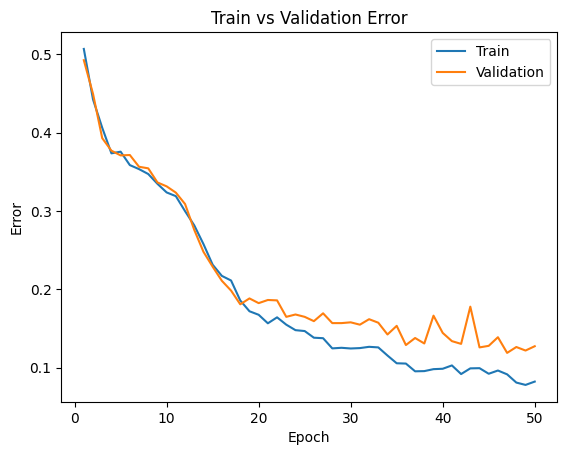

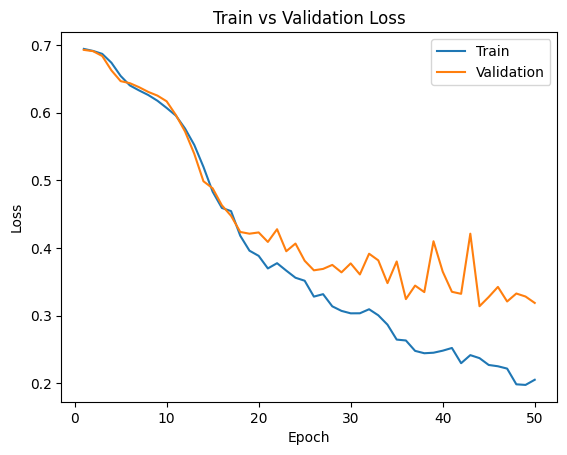

In [11]:
# TO BE COMPLETED

large_net = LargeNet()
train_net(large_net, learning_rate=0.02, batch_size=512, num_epochs=50)
large_model_bs512_lr02_path = get_model_name("large", batch_size=512, learning_rate=0.02, epoch=49)
plot_training_curve(large_model_bs512_lr02_path)




## Part 4. Evaluating the Best Model


### Part (i) [2pt MODEL]

Summarize in a table the results achieved on training and validation on all your model selections. This includes choice of `small_net` vs `large_net`, the `batch_size`, `learning_rate`,
**and the epoch number**. Hint: you can import the Pandas module to create tables.


Then upon reviewing the results choose your **best** model and load the model checkpoint. You can modify the code below to load your chosen set of weights to the model object `net`.

In [41]:
import pandas as pd
# net = #small or large network
net = LargeNet()
results = [
    {'net' : net.name, 'batch size' : 512, 'learning rate' : 0.02, 'epoch' : 30},
    {'net' : net.name, 'batch size' : 512, 'learning rate' : 0.02, 'epoch' : 50},
]

results_df = pd.DataFrame(results)
print(results_df)

     net  batch size  learning rate  epoch
0  large         512           0.02     30
1  large         512           0.02     50


In [42]:
# TO BE COMPLETED

model_path = get_model_name(net.name, batch_size=512, learning_rate=0.02, epoch=29)
state = torch.load(model_path)
net.load_state_dict(state)

<All keys matched successfully>

### Part (ii) [4pt DISCUSSION]

Justify your choice of model from Part (i).

In [43]:
'''
PROVIDE YOUR ANSWER BELOW

Two models were trained, and contrary to the belief that the error would decrease in the second model,
overfitting can be seen occurring as learning progresses.
Also, since the model is simple,
it seems better to choose the first model considering the complexity of the model.

'''

'\nPROVIDE YOUR ANSWER BELOW\n\nTwo models were trained, and contrary to the belief that the error would decrease in the second model,\noverfitting can be seen occurring as learning progresses.\nAlso, since the model is simple, \nit seems better to choose the first model considering the complexity of the model.\n\n'

### Part (iii) [4pt RESULT]

Using the helper code in Part 0, any code from lecture notes, or any code that you write, compute and report the **test classification error** for your chosen model.

In [16]:
# If you use the `evaluate` function provided in part 0, you will need to
# set batch_size > 1
train_loader, val_loader, test_loader, classes = get_data_loader(
    target_classes=["car", "truck"],
    batch_size=64)

Files already downloaded and verified
Files already downloaded and verified


In [17]:
# TO BE COMPLETED
criterion = nn.BCEWithLogitsLoss()
err, loss = evaluate(net, test_loader, criterion)

print(f"Error : {err}, Loss : {loss}")
print('Accuracy : ', 1-err)


Error : 0.153, Loss : 0.35643175058066845
Accuracy :  0.847


### Part (iv) [3pt DISCUSSION]

How does the test classification error compare with the **validation error**?
Explain why you would expect the test error to be *higher* than the validation error.

In [18]:
criterion = nn.BCEWithLogitsLoss()
err, loss = evaluate(net, val_loader, criterion)

print(f"Error : {err}, Loss : {loss}")
print('Accuracy : ', 1-err)

Error : 0.156, Loss : 0.3465328896418214
Accuracy :  0.844


In [19]:
'''
PROVIDE YOUR ANSWER BELOW

The expectation that the test error will be higher than the validation error is based on the idea
that the model performs well on the data seen during training and validation
but may struggle with entirely new and unseen data in the test set.
In this model, observing similar validation and training errors suggests
that the model is likely to exhibit comparable performance on new data,
akin to its performance on the training data.


'''

'\nPROVIDE YOUR ANSWER BELOW\n\nThe expectation that the test error will be higher than the validation error is based on the idea \nthat the model performs well on the data seen during training and validation \nbut may struggle with entirely new and unseen data in the test set. \nIn this model, observing similar validation and training errors suggests \nthat the model is likely to exhibit comparable performance on new data, \nakin to its performance on the training data.\n\n\n'

### Part (v) [3pt DISCUSSION]
Why did we only use the test data set at the very end?
Why is it important that we use the test data as little as possible?

In [20]:
'''
PROVIDE YOUR ANSWER BELOW


Since the test set must use data that has not been used for model training, the last set data is used.
Since the test dataset is used to evaluate the performance of the model,
if it is used too much, the model may overfit to the test set.
For this reason, it is used sparingly.


'''

'\nPROVIDE YOUR ANSWER BELOW\n\n\nSince the test set must use data that has not been used for model training, the last set data is used.\nSince the test dataset is used to evaluate the performance of the model, \nif it is used too much, the model may overfit to the test set. \nFor this reason, it is used sparingly.\n\n\n'

## Part 5. Fully-Connected Linear ANN vs CNN [4pt RESULT]

Test out a 3-layer linear fully-connected ANN architecture (see simpleANN below). You should explore different hyperparameter settings to determine how well you can do on the validation dataset. Once satisified with the performance, you may test it out on the test data.

How does the your best CNN model compare with an 2-layer linear ANN model (no convolutional layers) on classifying car and truck images?

In [21]:
class simpleANN(nn.Module):
    def __init__(self):
        super(simpleANN, self).__init__()
        self.name = "simple"
        self.fc1 = nn.Linear(32*32*3, 100)
        self.fc2 = nn.Linear(100, 20)
        self.fc3 = nn.Linear(20, 1)

    def forward(self, x):
        x = x.view(-1, 32*32*3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.4735, Train loss: 0.6918119192123413 |Validation err: 0.3955, Validation loss: 0.6855024993419647
Epoch 2: Train err: 0.3595, Train loss: 0.6777684763073921 |Validation err: 0.363, Validation loss: 0.6709141135215759
Epoch 3: Train err: 0.351875, Train loss: 0.6612843051552773 |Validation err: 0.36, Validation loss: 0.6554112434387207
Epoch 4: Train err: 0.3505, Train loss: 0.64503014087677 |Validation err: 0.3565, Validation loss: 0.641376793384552
Epoch 5: Train err: 0.349375, Train loss: 0.6298985257744789 |Validation err: 0.351, Validation loss: 0.6281156539916992
Epoch 6: Train err: 0.339375, Train loss: 0.6179690510034561 |Validation err: 0.3455, Validation loss: 0.6211063861846924
Epoch 7: Train err: 0.329625, Train loss: 0.6112911179661751 |Validation err: 0.3395, Validation loss: 0.6167142987251282
Epoch 8: Train err: 0.326375, Train loss: 0.6062671318650246 |Validation err: 0.336

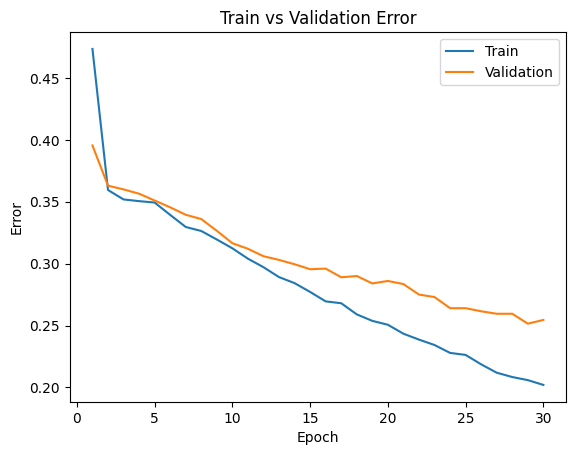

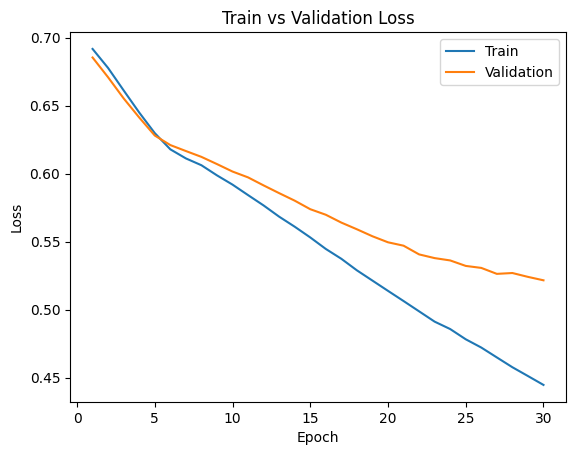

In [49]:
# TO BE COMPLETED

simple_ann = simpleANN()
train_net(simple_ann, learning_rate=0.01, batch_size=1024, num_epochs=30)
simple_ann_path = get_model_name(simple_ann.name, batch_size=1024, learning_rate=0.01, epoch=29)
plot_training_curve(simple_ann_path)


In [51]:
criterion = nn.BCEWithLogitsLoss()
err, loss = evaluate(simple_ann, val_loader, criterion)
print(f"Error : {err}, Loss : {loss}")
print('simple_ann val accuracy : ', 1-err)

err, loss = evaluate(simple_ann, test_loader, criterion)
print(f"Error : {err}, Loss : {loss}")
print('simple_ann test accuracy : ', 1-err)

err, loss = evaluate(net, val_loader, criterion)
print(f"Error : {err}, Loss : {loss}")
print('my model val accuracy : ', 1-err)

err, loss = evaluate(net, test_loader, criterion)
print(f"Error : {err}, Loss : {loss}")
print('my model test accuracy : ', 1-err)



'''
PROVIDE YOUR ANSWER BELOW

Certainly, by examining the test accuracy results,
it is evident that the CNN model performed better with an accuracy of 0.847
compared to the simple ANN model, which had an accuracy of 0.736.
This suggests that the CNN model exhibits superior performance for the given task.


'''

Error : 0.2545, Loss : 0.52112977206707
simple_ann val accuracy :  0.7455
Error : 0.2635, Loss : 0.515385233797133
simple_ann test accuracy :  0.7364999999999999
Error : 0.156, Loss : 0.35354402801021934
my model val accuracy :  0.844
Error : 0.153, Loss : 0.3504444807767868
my model test accuracy :  0.847


'\nPROVIDE YOUR ANSWER BELOW\n\nCertainly, by examining the test accuracy results, \nit is evident that the CNN model performed better with an accuracy of 0.847 \ncompared to the simple ANN model, which had an accuracy of 0.736. \nThis suggests that the CNN model exhibits superior performance for the given task.\n\n\n'

# PART C (Optional) - Bonus Challenge!

This is an optional exercise for those that finish the assignment early and would like to perform a deeper exploration of the assignment.

In part A we constructed and trained a 2-layer neural network from scratch. In Part B we saw how PyTorch can be used to simplify the construction of neural networks by taking care of all the complexity related to gradient calculations, training on GPUs, and structuring your code.

For this bonus challenge we will propose additional task that will have you work towards completing the pipeline and deploying the models online, while exploring ways to improve these models along the way.

Tasks:

1. Modify your code to classify images that are not cars or trucks into the category "other".
2. Preprocess images from the internet to be able to classify any images into cars and trucks (i.e., resize, aspect ratio, etc.). Evaluate your best model's performance on images loaded from the internet.
3. Deploy your best model onto huggingface spaces (or other web hosting services) to classify images into cars, trucks, and "other" if you've completed task 1.

Bonus marks will be provided based on the number of tasks completed and how well they are completed. Summarize below your results and anything intersting you learned from the steps that you completed. Bonus marks cannot be accumulated beyond a maximum assignment grade.

In [ ]:
# TO BE COMPLETED






In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

### Saving to HTML
Detailed instructions for saving to HTML can be found <a href="https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858">here</a>. Provided below are a summary of the instructions:

(1) download your ipynb file by clicking on File->Download.ipynb

(2) reupload your file to the temporary Google Colab storage (you can access the temporary storage from the tab to the left)

(3) run the following:

In [ ]:
%%shell
jupyter nbconvert --to html A1_PyTorch_Introduction.ipynb

(4) the html file will be available for download in the temporary Google Colab storage

(5) review the html file and make sure all the results are visible before submitting your assignment to Quercus

# Assignment Grading Rubric
The grading of the assignment will be based on the following categories:

(1) **10 Pt - EXPLORATORY QUESTIONS** These are basic questions that in most cases can be answered without requiring a fully working and trained neural network model. For example, data loading, processing and visualization, summary statistics, data exploration, model and training setup, etc.

(2) **10 Pt - MODEL** Student has successfully implemented all the required neural network models and has demonstrated successful training of the model without any errors.

(3) **10 Pt - RESULT** Students are evaluated based on the results achieved in comparison to the expected results of the assignment.

(4) **10 Pt - DISCUSSION QUESTIONS** Student demonstrated understanding beyond the basic exploratory questions, can answer some of the more challenging questions, and provide arguments for their model selection decisions.

(5) **10 Pt - COMMUNICATION** Student has provided a quality submission that is easy to read without too many unnecessary output statements that distract the reading of the document. The code has been well commented and all the answers are communicated clearly and concisely.

(6) **10 Pt - BONUS** Student has completed the assignment and has taken on the challenging bonus tasks listed in PART C. The student has demonstrated a good understanding of all aspects of the assignment and has exceeded expectations for the assignment.



**TOTAL GRADE = _____ of 50 Pts**